## Employee Status Prediction 

In [1]:
## import the libraries.

import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
## load the data.

df=pd.read_csv('ATTRITION DATA.CSV',na_filter=False)

C:\Users\guess\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
## reading non null values only.

print(df.shape)
df1=df[df['EMP_ID']!=""]
print(df1.shape)
df.head(5)

(171525, 18)
(142748, 18)


,EMP_ID,Manager_ID,GENDER,DATE_OF_BIRTH,DATE_OF_JOIN,MARITAL_STATUS,P_CITY_NAME,LAST_DATE,EMP_STATUS,Title1,Latest_Rating,RESIGNATION_REASON,OFFICE_NAME,Office_city,Level_NAME,UNIT_NAME,QUALIFICATION_LEVEL,CLIENT_NAME
0,10058,10764,FEMALE,5/21/1983,12/31/2005,S,Bangalore,3/5/2008,InActive,Officer,3,"Less Salary , hated long working hours",Hyd Grand Vista,Hyderabad,Non Management,Domestic,Post Grad,Tel-Airtel
1,10077,544,FEMALE,6/27/1982,12/31/2005,S,Bangalore,8/31/2006,InActive,Officer,3,"Less Salary , hated long working hours",Hyd Kpalli,Hyderabad,Non Management,Domestic,Post Grad,Tel-Airtel
2,10102,9507,MALE,8/15/2000,12/31/2005,S,Bangalore,10/6/2007,InActive,Officer,3,"Less Salary , hated long working hours",Hyd Kpalli,Hyderabad,Non Management,Domestic,Post Grad,Tel-Airtel
3,10147,NULL,MALE,10/9/1980,12/30/2005,S,Bangalore,5/15/2007,InActive,Officer,3,"Less Salary , hated long working hours",Hyd Kpalli,Hyderabad,Non Management,Domestic,Post Grad,Tel-Airtel
4,10151,8656,MALE,7/31/1982,12/31/2005,S,Bangalore,5/21/2007,InActive,Officer,3,"Less Salary , hated long working hours",Hyd Kpalli,Hyderabad,Non Management,Domestic,Post Grad,Tel-Airtel


In [4]:
## observe the info of the features.

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142748 entries, 0 to 142747
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   EMP_ID               142748 non-null  object
 1   Manager_ID           142748 non-null  object
 2   GENDER               142748 non-null  object
 3   DATE_OF_BIRTH        142748 non-null  object
 4   DATE_OF_JOIN         142748 non-null  object
 5   MARITAL_STATUS       142748 non-null  object
 6   P_CITY_NAME          142748 non-null  object
 7   LAST_DATE            142748 non-null  object
 8   EMP_STATUS           142748 non-null  object
 9   Title1               142748 non-null  object
 10  Latest_Rating        142748 non-null  object
 11  RESIGNATION_REASON   142748 non-null  object
 12  OFFICE_NAME          142748 non-null  object
 13  Office_city          142748 non-null  object
 14  Level_NAME           142748 non-null  object
 15  UNIT_NAME            142748 non-nu

In [5]:
## check for the null values

df1.isnull().mean()*100

EMP_ID                 0.0
Manager_ID             0.0
GENDER                 0.0
DATE_OF_BIRTH          0.0
DATE_OF_JOIN           0.0
MARITAL_STATUS         0.0
P_CITY_NAME            0.0
LAST_DATE              0.0
EMP_STATUS             0.0
Title1                 0.0
Latest_Rating          0.0
RESIGNATION_REASON     0.0
OFFICE_NAME            0.0
Office_city            0.0
Level_NAME             0.0
UNIT_NAME              0.0
QUALIFICATION_LEVEL    0.0
CLIENT_NAME            0.0
dtype: float64

In [6]:
## type of the feature

type(df1['DATE_OF_BIRTH'])

pandas.core.series.Series

In [7]:
## converting the date format.

df1['DATE_OF_BIRTH'] =  pd.to_datetime(df1['DATE_OF_BIRTH'], format='%m/%d/%Y', errors='coerce') 

<ipython-input-7-b40590b13c5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE_OF_BIRTH'] =  pd.to_datetime(df1['DATE_OF_BIRTH'], format='%m/%d/%Y', errors='coerce')


In [8]:
df1['DATE_OF_JOIN'] =  pd.to_datetime(df1['DATE_OF_JOIN'], format='%m/%d/%Y', errors='coerce') 

<ipython-input-8-90b358f48284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE_OF_JOIN'] =  pd.to_datetime(df1['DATE_OF_JOIN'], format='%m/%d/%Y', errors='coerce')


In [9]:
df1['LAST_DATE'] =  pd.to_datetime(df1['LAST_DATE'], format='%m/%d/%Y', errors='coerce') 

<ipython-input-9-75f15d6d9227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LAST_DATE'] =  pd.to_datetime(df1['LAST_DATE'], format='%m/%d/%Y', errors='coerce')


In [10]:
## print the converted date format.

print(df1[['DATE_OF_BIRTH','DATE_OF_JOIN','LAST_DATE']])

       DATE_OF_BIRTH DATE_OF_JOIN  LAST_DATE
0         1983-05-21   2005-12-31 2008-03-05
1         1982-06-27   2005-12-31 2006-08-31
2         2000-08-15   2005-12-31 2007-10-06
3         1980-10-09   2005-12-30 2007-05-15
4         1982-07-31   2005-12-31 2007-05-21
...              ...          ...        ...
142743    1991-05-03   2012-06-25 2014-02-14
142744    1991-03-06   2012-07-24 2013-03-27
142745    1990-08-16   2012-07-25 2013-01-11
142746    1989-10-05   2012-08-02 2013-04-19
142747    1986-04-26   2012-08-02 2013-01-31

[142748 rows x 3 columns]


In [11]:
## convert the datatpe to string 

df1['P_CITY_NAME'] = df1['P_CITY_NAME'].astype('str')
df1['Office_city'] = df1['Office_city'].astype('str')
print(df1['P_CITY_NAME'])

0         Bangalore
1         Bangalore
2         Bangalore
3         Bangalore
4         Bangalore
            ...    
142743    Bangalore
142744    Bangalore
142745     Chittoor
142746    Bangalore
142747         NULL
Name: P_CITY_NAME, Length: 142748, dtype: object


<ipython-input-11-e6b07cd9fdcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['P_CITY_NAME'] = df1['P_CITY_NAME'].astype('str')
<ipython-input-11-e6b07cd9fdcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Office_city'] = df1['Office_city'].astype('str')


In [12]:
## assigning Office_city as 0 and reamining as 1.

df1['Migration_Status'] = np.where((df1.P_CITY_NAME==df1.Office_city),0,1)
print(df1['Migration_Status'])

0         1
1         1
2         1
3         1
4         1
         ..
142743    0
142744    0
142745    1
142746    0
142747    1
Name: Migration_Status, Length: 142748, dtype: int32


<ipython-input-12-d97ddb7d3a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Migration_Status'] = np.where((df1.P_CITY_NAME==df1.Office_city),0,1)


In [13]:
## convert datatype as category

df1['P_CITY_NAME'] = df1['P_CITY_NAME'].astype('category')

<ipython-input-13-9741b12a2954>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['P_CITY_NAME'] = df1['P_CITY_NAME'].astype('category')


In [14]:
type(df1['P_CITY_NAME'] )

pandas.core.series.Series

In [15]:
## conert variable datatype to category.

df1['GENDER'] = df1['GENDER'].astype('category')
df1['Manager_ID'] = df1['Manager_ID'].astype('category')
df1['MARITAL_STATUS'] = df1['MARITAL_STATUS'].astype('category')
df1['EMP_STATUS'] = df1['EMP_STATUS'].astype('category')
df1['Title1'] = df1['Title1'].astype('category')
df1['RESIGNATION_REASON'] = df1['RESIGNATION_REASON'].astype('category')
df1['OFFICE_NAME'] = df1['OFFICE_NAME'].astype('category')
df1['Office_city'] = df1['Office_city'].astype('category')
df1['Level_NAME'] = df1['Level_NAME'].astype('category')
df1['UNIT_NAME'] = df1['UNIT_NAME'].astype('category')
df1['QUALIFICATION_LEVEL'] = df1['QUALIFICATION_LEVEL'].astype('category')
df1['CLIENT_NAME'] = df1['CLIENT_NAME'].astype('category')
df1['Migration_Status'] = df1['Migration_Status'].astype('category')

<ipython-input-15-9b0ecba27918>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GENDER'] = df1['GENDER'].astype('category')
<ipython-input-15-9b0ecba27918>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Manager_ID'] = df1['Manager_ID'].astype('category')
<ipython-input-15-9b0ecba27918>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [16]:
df1.describe()

<ipython-input-16-784441b173b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe()
<ipython-input-16-784441b173b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe()
<ipython-input-16-784441b173b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe()


,EMP_ID,Manager_ID,GENDER,DATE_OF_BIRTH,DATE_OF_JOIN,MARITAL_STATUS,P_CITY_NAME,LAST_DATE,EMP_STATUS,Title1,Latest_Rating,RESIGNATION_REASON,OFFICE_NAME,Office_city,Level_NAME,UNIT_NAME,QUALIFICATION_LEVEL,CLIENT_NAME,Migration_Status
count,142748,142748,142748,142748,142748,142748,142748,125252,142748,142748,142748.0,142748,142748,142748,142748,142748,142748,142748,142748.0
unique,142746,5047,3,8635,3578,10,347,3398,2,23,9.0,4,64,21,1,5,5,14,2.0
top,108597,9674,MALE,1947-08-15 00:00:00,2015-09-01 00:00:00,S,NULL,2007-10-11 00:00:00,InActive,Officer,3.0,Enjoyed time in HGS but moving to different city,Chennai,Bangalore,Non Management,Domestic,Masters,Tel-Airtel,1.0
freq,2,908,102490,389,3042,126754,23430,406,125252,111814,47308.0,52036,20005,42094,142748,120729,125574,91035,74015.0
first,NaN,NaN,NaN,1947-06-01 00:00:00,1984-12-15 00:00:00,NaN,NaN,2006-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2007-10-17 00:00:00,2017-04-25 00:00:00,NaN,NaN,2017-04-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## the recent date of joining.

Max_date=max(df1['DATE_OF_JOIN'])
print(Max_date)

2017-04-25 00:00:00


In [18]:
## represent the worked tenure into days.

df1["Tenure"]= np.where((df1.EMP_STATUS =="InActive"), (df1["LAST_DATE"].sub(df1['DATE_OF_JOIN'], axis=0)), (-(df1["DATE_OF_JOIN"].sub(max(df1['DATE_OF_JOIN']), axis=0))))
df1["Tenure"]=df1["Tenure"] / np.timedelta64(1, 'D')
print(df1["Tenure"])


0         795.0
1         243.0
2         644.0
3         501.0
4         506.0
          ...  
142743    599.0
142744    246.0
142745    170.0
142746    260.0
142747    182.0
Name: Tenure, Length: 142748, dtype: float64


<ipython-input-18-6718ee4bbb03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Tenure"]= np.where((df1.EMP_STATUS =="InActive"), (df1["LAST_DATE"].sub(df1['DATE_OF_JOIN'], axis=0)), (-(df1["DATE_OF_JOIN"].sub(max(df1['DATE_OF_JOIN']), axis=0))))
<ipython-input-18-6718ee4bbb03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Tenure"]=df1["Tenure"] / np.timedelta64(1, 'D')


In [19]:
## calaulate the Age 

df1["Age"]= np.where((df1.EMP_STATUS =="InActive"), (df1["LAST_DATE"].sub(df1['DATE_OF_BIRTH'], axis=0)), (-(df1["DATE_OF_BIRTH"].sub(max(df1['DATE_OF_JOIN']), axis=0))))
df1["Age"]=round((df1["Age"] / np.timedelta64(1, 'D'))/365,0)
print(df1["Age"])

0         25.0
1         24.0
2          7.0
3         27.0
4         25.0
          ... 
142743    23.0
142744    22.0
142745    22.0
142746    24.0
142747    27.0
Name: Age, Length: 142748, dtype: float64


<ipython-input-19-082e870e8976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"]= np.where((df1.EMP_STATUS =="InActive"), (df1["LAST_DATE"].sub(df1['DATE_OF_BIRTH'], axis=0)), (-(df1["DATE_OF_BIRTH"].sub(max(df1['DATE_OF_JOIN']), axis=0))))
<ipython-input-19-082e870e8976>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"]=round((df1["Age"] / np.timedelta64(1, 'D'))/365,0)


<AxesSubplot:xlabel='EMP_STATUS', ylabel='Age'>

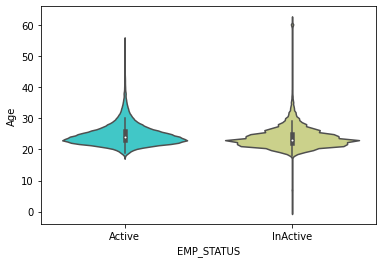

In [20]:
## distrubution of emp wrt Age

sns.violinplot(x="EMP_STATUS", y="Age", data=df1,palette='rainbow')

In [21]:
## count of age bet 18 to 30

df1=df1[(df1["Age"]>=18) & (df1["Age"]<=30)]
print(len(df1))

136282


<AxesSubplot:xlabel='EMP_STATUS', ylabel='Tenure'>

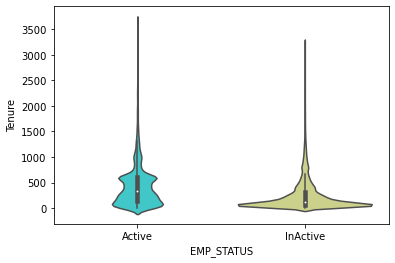

In [22]:
## distrubution of emp wrt Teunre

sns.violinplot(x="EMP_STATUS", y="Tenure", data=df1,palette='rainbow')

In [23]:
df1=df1[(df1["Tenure"]>=0) & (df1["Tenure"]<=1000)]
print(len(df1))

130931


In [24]:
## creating bin wrt age 

df1["Tenure_bins"]= np.where(((df1.Tenure >=0) & (df1.Tenure <=30)) ,"Tenure 0-30", np.where(((df1.Tenure >30) & (df1.Tenure <=60)) ,"Tenure 31-60", np.where(((df1.Tenure >60) & (df1.Tenure <=90)) ,"Tenure 61-100", np.where(((df1.Tenure >100) & (df1.Tenure <=130)) ,"Tenure 101-130",np.where(((df1.Tenure >131) & (df1.Tenure <=160)) ,"Tenure 131-160",np.where(((df1.Tenure >160) & (df1.Tenure <=200)) ,"Tenure 161-200",np.where(((df1.Tenure >200) & (df1.Tenure <=230)) ,"Tenure 201-230",np.where(((df1.Tenure >230) & (df1.Tenure <=260)) ,"Tenure 231-260",np.where(((df1.Tenure >260) & (df1.Tenure <=300)) ,"Tenure 261-300",np.where(((df1.Tenure >300) & (df1.Tenure <=330)) ,"Tenure 301-330",np.where(((df1.Tenure >330) & (df1.Tenure <=365)) ,"Tenure 331-365","Tenure more than 365")))))))))))

In [25]:
## bin crerated values

print(df1["Tenure_bins"])

0         Tenure more than 365
1               Tenure 231-260
3         Tenure more than 365
4         Tenure more than 365
5               Tenure 261-300
                  ...         
142743    Tenure more than 365
142744          Tenure 231-260
142745          Tenure 161-200
142746          Tenure 231-260
142747          Tenure 161-200
Name: Tenure_bins, Length: 130931, dtype: object


In [26]:
## convert datatyoe of Tenure_bins to category 

df1["Tenure_bins"] = df1["Tenure_bins"].astype('category')

In [27]:
# Table of Tenure_bins vs. EMP_STATUS

survived_class = pd.crosstab(index=df1["Tenure_bins"], 
                           columns=df1["EMP_STATUS"])


survived_class.columns= ["ACTIVE","INACTIVE"]
survived_class

,ACTIVE,INACTIVE
Tenure_bins,,
Tenure 0-30,1172,10795
Tenure 101-130,708,10615
Tenure 131-160,596,7326
Tenure 161-200,801,7505
Tenure 201-230,764,4914
Tenure 231-260,554,4314
Tenure 261-300,816,4506
Tenure 301-330,534,2638
Tenure 31-60,1083,17642


In [28]:
# Table of Level_NAME vs. EMP_STATUS

survived_class = pd.crosstab(index=df1["Level_NAME"], 
                           columns=df1["EMP_STATUS"])


survived_class.columns= ["ACTIVE","INACTIVE"]
survived_class

,ACTIVE,INACTIVE
Level_NAME,,
Non Management,14964,115967


In [29]:
# Table of UNIT_NAME vs. EMP_STATUS

survived_class = pd.crosstab(index=df1["UNIT_NAME"], 
                           columns=df1["EMP_STATUS"])


survived_class.columns= ["ACTIVE","INACTIVE"]
survived_class 

,ACTIVE,INACTIVE
UNIT_NAME,,
Domestic,9946,101614
International Data,4633,10368
International Voice,195,3427
MENA,146,448
Strategic Initiatives,44,110


In [30]:
print(len(df1))
print(101614/115967)

130931
0.8762320315262101


In [31]:
## Domestic emp count 

df1=df1[df1["UNIT_NAME"]=="Domestic"]
len(df1)

111560

In [32]:
## assinging values to df2

df2=df1[['EMP_STATUS','Manager_ID','GENDER','MARITAL_STATUS','P_CITY_NAME','RESIGNATION_REASON','OFFICE_NAME','Office_city','Tenure_bins','CLIENT_NAME','QUALIFICATION_LEVEL',"Age","Tenure","Migration_Status","Latest_Rating","Title1"]]

In [33]:
## observe the correlation bet features

df2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson',min_periods =1)

,EMP_STATUS,Manager_ID,GENDER,MARITAL_STATUS,P_CITY_NAME,RESIGNATION_REASON,OFFICE_NAME,Office_city,Tenure_bins,CLIENT_NAME,QUALIFICATION_LEVEL,Age,Tenure,Migration_Status,Latest_Rating,Title1
EMP_STATUS,1.000000,-0.071485,-0.094330,0.133134,0.015824,0.394158,0.060530,0.034308,-0.118047,0.087724,0.444478,-0.056489,-0.014408,-0.076433,-0.224739,0.050037
Manager_ID,-0.071485,1.000000,0.040216,-0.087056,0.054141,-0.035177,0.128255,0.178046,0.016525,-0.093661,-0.092291,0.024223,0.046268,0.047133,0.031396,-0.068219
GENDER,-0.094330,0.040216,1.000000,-0.077181,0.047057,-0.018936,0.024261,0.063028,0.061307,-0.087762,-0.046291,-0.013094,-0.010087,-0.052732,0.018003,-0.011296
MARITAL_STATUS,0.133134,-0.087056,-0.077181,1.000000,-0.073712,0.161698,0.037012,0.112251,-0.068525,0.106906,0.193290,-0.053545,-0.082851,-0.085437,-0.035361,0.030185
P_CITY_NAME,0.015824,0.054141,0.047057,-0.073712,1.000000,-0.017297,-0.004894,-0.031493,0.036495,-0.045221,-0.022184,-0.051635,0.012370,-0.372434,-0.001907,-0.041494
RESIGNATION_REASON,0.394158,-0.035177,-0.018936,0.161698,-0.017297,1.000000,0.014799,0.024240,-0.045616,0.031807,0.305883,-0.048301,-0.037870,-0.080588,-0.089862,0.088533
OFFICE_NAME,0.060530,0.128255,0.024261,0.037012,-0.004894,0.014799,1.000000,0.686836,-0.010178,0.091108,0.008381,0.014683,0.029507,-0.166234,-0.021026,-0.035981
Office_city,0.034308,0.178046,0.063028,0.112251,-0.031493,0.024240,0.686836,1.000000,-0.049863,-0.203226,-0.007462,0.036409,0.024784,-0.111448,-0.015529,-0.082166
Tenure_bins,-0.118047,0.016525,0.061307,-0.068525,0.036495,-0.045616,-0.010178,-0.049863,1.000000,0.007027,-0.089649,0.120484,-0.067980,0.009614,0.025341,-0.085658
CLIENT_NAME,0.087724,-0.093661,-0.087762,0.106906,-0.045221,0.031807,0.091108,-0.203226,0.007027,1.000000,0.066437,-0.015876,-0.040678,-0.040853,-0.018844,0.053866


In [34]:
## apply one hot encoding 

dummy_M=pd.get_dummies(df1["MARITAL_STATUS"])
dummy_T=pd.get_dummies(df1["Tenure_bins"])
dummy_Q=pd.get_dummies(df1["QUALIFICATION_LEVEL"])

In [35]:
## assign EMP_STATUS and Latest_Rating to df3

df3=df2[["EMP_STATUS","Latest_Rating"]]
df3.head()

,EMP_STATUS,Latest_Rating
0,InActive,3
1,InActive,3
3,InActive,3
4,InActive,3
5,InActive,3


In [36]:
## concat the encioded values

df3=pd.concat([df3,dummy_M,dummy_T,dummy_Q],axis=1)
df3.head()

,EMP_STATUS,Latest_Rating,D,DP,LT,M,NULL,S,SP,UnMarried,...,Tenure 301-330,Tenure 31-60,Tenure 331-365,Tenure 61-100,Tenure more than 365,Diploma,Graduation,Gruduation,Masters,Post Grad
0,InActive,3,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,InActive,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,InActive,3,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,InActive,3,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,InActive,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#split dataset in features and target variable

X = df3[[i for i in list(df3.columns) if i != 'EMP_STATUS']] # Features

y = df3["EMP_STATUS"] # Target variable

In [38]:
## import train test split from skleran

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Logistic Regression

In [39]:
# import the class

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)

logreg = LogisticRegression()

# fit the model with data

result=logreg.fit(X_train,y_train)

# define y_pred
y_pred=logreg.predict(X_test)

C:\Users\guess\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print(X_train)

       Latest_Rating  D  DP  LT  M  NULL  S  SP  UnMarried  W  ...  \
123445             1  0   0   0  0     0  1   0          0  0  ...   
42307              3  0   0   0  0     0  1   0          0  0  ...   
87261              4  0   0   0  0     0  1   0          0  0  ...   
84685              5  0   0   0  0     0  1   0          0  0  ...   
139473             1  0   0   0  0     0  1   0          0  0  ...   
...              ... ..  ..  .. ..   ... ..  ..        ... ..  ...   
28357              3  0   0   0  0     0  1   0          0  0  ...   
86853              2  0   0   0  0     0  1   0          0  0  ...   
50766              2  0   0   0  0     0  1   0          0  0  ...   
68299              2  0   0   0  0     0  1   0          0  0  ...   
129033             3  0   0   0  0     0  1   0          0  0  ...   

        Tenure 301-330  Tenure 31-60  Tenure 331-365  Tenure 61-100  \
123445               0             0               0              0   
42307            

In [41]:
print(y_train)

123445    InActive
42307     InActive
87261       Active
84685       Active
139473    InActive
            ...   
28357     InActive
86853     InActive
50766     InActive
68299     InActive
129033      Active
Name: EMP_STATUS, Length: 78092, dtype: category
Categories (2, object): ['Active', 'InActive']


In [42]:
print(y_test)

89599       Active
127961    InActive
120679    InActive
129682    InActive
44147     InActive
            ...   
94004     InActive
58860     InActive
126159    InActive
112592    InActive
131684    InActive
Name: EMP_STATUS, Length: 33468, dtype: category
Categories (2, object): ['Active', 'InActive']


In [43]:
print(y_pred)

['InActive' 'InActive' 'InActive' ... 'InActive' 'InActive' 'InActive']


In [44]:
## import metrics from sklearn 

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2360,   630],
       [   56, 30422]], dtype=int64)

In [45]:
## import classification report from sklearn

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Active       0.98      0.79      0.87      2990
    InActive       0.98      1.00      0.99     30478

    accuracy                           0.98     33468
   macro avg       0.98      0.89      0.93     33468
weighted avg       0.98      0.98      0.98     33468



In [46]:
## print the accuracy

from sklearn import metrics
score_train = logreg.score(X_train, y_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(score_train))
score_test = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score_test))

Accuracy of logistic regression classifier on train set: 0.98
Accuracy of logistic regression classifier on test set: 0.98


[[7.82177146e-02 9.21782285e-01]
 [6.69387235e-09 9.99999993e-01]
 [4.80301443e-09 9.99999995e-01]
 ...
 [6.69387235e-09 9.99999993e-01]
 [5.64009683e-09 9.99999994e-01]
 [3.08623327e-09 9.99999997e-01]]


C:\Users\guess\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

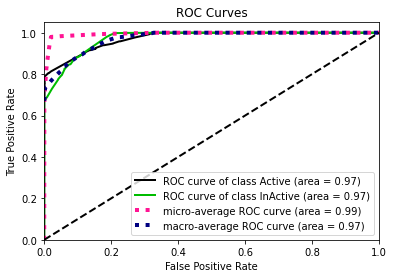

In [47]:
## import scikitplot and matplotlib and y_prob

import scikitplot as skplt
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
y_probs=result.predict_proba(X_test)
print(y_probs)

skplt.metrics.plot_roc_curve(y_test, y_probs)


## Decision Tree

In [48]:
## import tree from skleran and fit anfd run 

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf)
y_pred=clf.predict(X_test)

DecisionTreeClassifier()


In [49]:
## print confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 2358   632]
 [   55 30423]]
              precision    recall  f1-score   support

      Active       0.98      0.79      0.87      2990
    InActive       0.98      1.00      0.99     30478

    accuracy                           0.98     33468
   macro avg       0.98      0.89      0.93     33468
weighted avg       0.98      0.98      0.98     33468



In [50]:
## print the accuracy

print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  97.94729293653639


## Random Forest

In [51]:
## import RandomForestClassifier and make_classification from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [52]:
## fit and run

clf = RandomForestClassifier(n_estimators=10, max_depth=2,random_state=0)
clf=clf.fit(X_train, y_train)
print(clf)
y_pred=clf.predict(X_test)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)


In [53]:
## print the confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[  934  2056]
 [    0 30478]]
              precision    recall  f1-score   support

      Active       1.00      0.31      0.48      2990
    InActive       0.94      1.00      0.97     30478

    accuracy                           0.94     33468
   macro avg       0.97      0.66      0.72     33468
weighted avg       0.94      0.94      0.92     33468



In [54]:
## print the accuracy

print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  93.85681845344807
